In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.sql import label
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# reflect an existing database into a new model
Base = automap_base()

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
Rec_date = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).first()

print(Rec_date) #check to make sure I have the most recent date

('2017-08-23', 0.0)


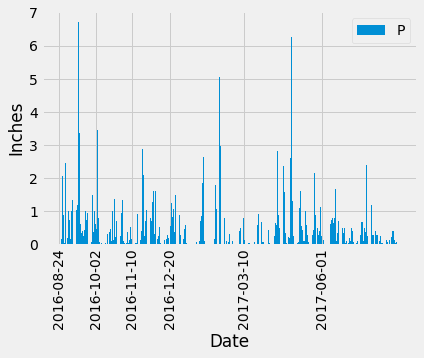

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
qry = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date > '2016-08-23').order_by(Measurement.date.asc()).all()
#print(qry)
# Save the query results as a Pandas DataFrame and set the index to the date column
 

M_df = pd.DataFrame(qry, columns= ['date','prcp']).dropna()
M_df


xticks = []
for index, rows in M_df.iterrows():
    if index % 250 == 0: 
        xticks.append(rows["date"])
        

#print(xticks)
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

plt.bar(M_df.date, M_df.prcp, align="center")
plt.xticks(xticks, rotation = 90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(labels= "Precipitation")
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
round(M_df.describe(), 2)

,prcp
count,2015.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number stations in the dataset
Station_cnt = session.query(label('station', Measurement.station), func.count(Measurement.station)).\
    group_by(Measurement.station).all()
Station_cnt

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [52]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.



In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
qry2 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.round(func.avg(Measurement.tobs), 1)).\
    filter(Measurement.station == 'USC00519281').all()
qry2


[(54.0, 85.0, 71.7)]

In [77]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
qry3= session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date <= '2017-08-18').\
    filter(Measurement.date > '2016-08-18').all()
St_df = pd.DataFrame(qry3, columns= ['station','date','prcp','tobs']).dropna()
St_df

#Most = St_df.groupby('station').nunique().sort_values(by='date', ascending = False)
#Most

#Act_station = St_df[St_df['station'] == 'USC00519281']
#Act_station = Act_station.sort_values(by = 'date', ascending = False)
#mask = (Act_station['date'] > '2016-08-18') & (Act_station['date'] <= '2017-08-18')
#print(Act_station.loc[mask])

,station,date,prcp,tobs
0,USC00519281,2016-08-19,0.31,79.0
1,USC00519281,2016-08-20,0.13,81.0
2,USC00519281,2016-08-21,0.08,79.0
3,USC00519281,2016-08-22,2.32,78.0
4,USC00519281,2016-08-23,1.79,77.0
...,...,...,...,...
351,USC00519281,2017-08-14,0.00,77.0
352,USC00519281,2017-08-15,0.32,77.0
353,USC00519281,2017-08-16,0.12,76.0
354,USC00519281,2017-08-17,0.01,76.0


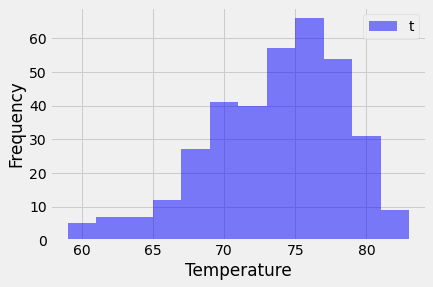

In [82]:
n_bins = 12
n, bins, patches = plt.hist(St_df['tobs'], n_bins, facecolor='blue', alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend("tobs")
plt.show()

# Close session

In [17]:
# Close Session
session.close()